# Importing libraries and Dataset

In [151]:
#Sanikumar sahani

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

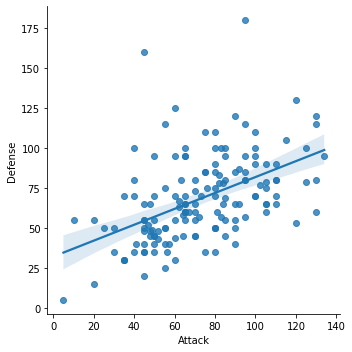

In [42]:
df=pd.read_csv('Pokemon.csv',encoding= 'unicode_escape',index_col=0)
sns.lmplot(x='Attack',y='Defense',data=df)  #to plot the scatterplot from attack and defence column

# To remove the regression lines 

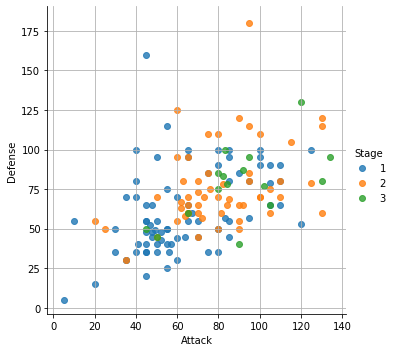

In [44]:
#Scatterplot Arguments
sns.lmplot(x='Attack',
          y='Defense',
           data=df,
          fit_reg=False, #=> No regression line
          hue='Stage')   #=> Color by evolution stage
plt.grid()

# Customizing with Matplotlib

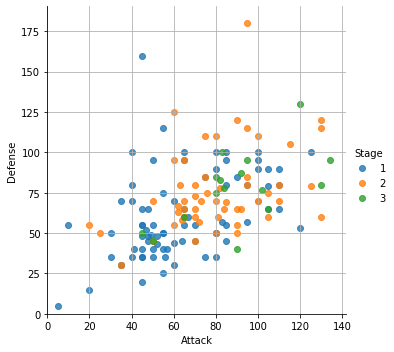

In [52]:
#Ploot using seaborn
sns.lmplot(x='Attack',
          y='Defense',
          data=df,
          fit_reg=False,
          hue='Stage')
#tweak using Matplotlib customization functions
plt.ylim(0,None)
plt.xlim(0,None)
plt.grid()

# The Role of Customization Pandas

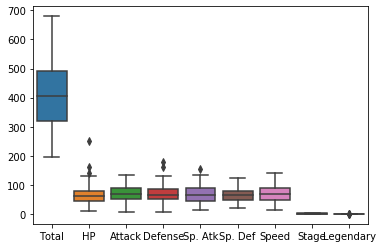

In [60]:
#Boxplot
sns.boxplot(data=df)
# plt.grid()

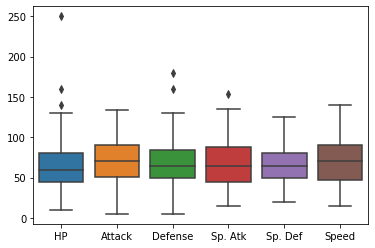

In [62]:
#Preformat Data Frame
stats_df = df.drop(['Total','Stage','Legendary'], axis=1)

#New boxplot using stats_df
sns.boxplot(data=stats_df)

# Seaborn Themes

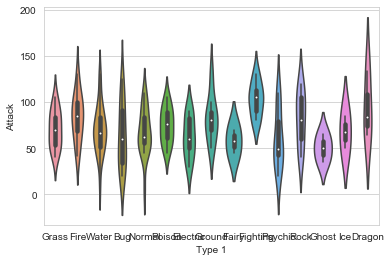

In [71]:
# The default theme is called darkgrid
sns.set_style('whitegrid')

#violin plot
sns.violinplot(x='Type 1', y='Attack',data=df)

# Color Palettes

In [73]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

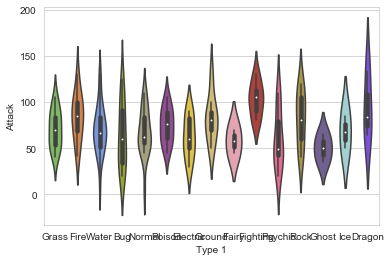

In [80]:
#violin plot with pokemon color palette
sns.violinplot(x='Type 1',y='Attack',data=df,
              palette=pkmn_type_colors)   #=> Set color palette

# Swarm Plot

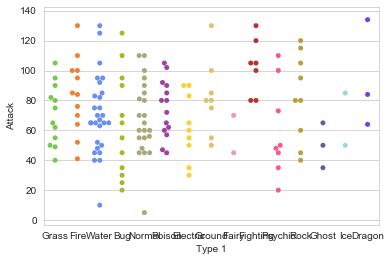

In [85]:
#Swarm plot with pokemon color palette
sns.swarmplot(x='Type 1',y='Attack',data=df,
             palette=pkmn_type_colors)

# Overlaying Plots

Text(0.5, 1.0, 'Attack by Type')

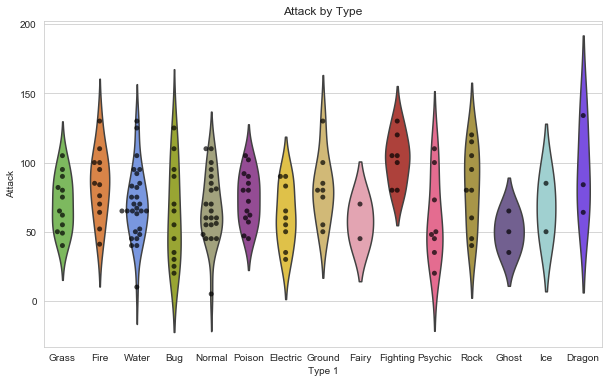

In [93]:
# set figure size with matplotlib
plt.figure(figsize=(10,6))


#create ploy
sns.violinplot(x='Type 1',
              y='Attack',
              data=df,
              inner=None,   #=> Remove the bars inside the values
              palette=pkmn_type_colors)




sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k',    # Make points black 
              alpha=0.7)   #=. and slightly transparent

#Set title with matplotlib
plt.title('Attack by Type')


# Putting it all together

In [98]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As the stats are in seperate columns,
Instead we want to "melt" them into one column

we use Panda's melt() function 
It takes three arguments
1. the DataFrame to melt
2. second Id variables to keep(Pandas will melt all of the other ones)
3. A name for the new, melted variable

In [102]:
# Melt Dataframe
melted_df = pd.melt(stats_df,
                   id_vars=["Name",'Type 1','Type 2'],  # variables to keep
                   var_name="Stat")   #Name of melted variable
melted_df.head(10)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
5,Charizard,Fire,Flying,HP,78
6,Squirtle,Water,NaN,HP,44
7,Wartortle,Water,NaN,HP,59
8,Blastoise,Water,NaN,HP,79
9,Caterpie,Bug,NaN,HP,45


All 6 of the stat columns have been "melted" into one, and the new stat column indicates the original stat(HP,Attack, Defence, Sp. Attack, Sp. Defence, or Speed).
for example, it's hard to see above but Bulbasaur now has 6 rows of data

In [109]:
print(stats_df.shape)   #before melting
print(melted_df.shape)  #after melting it has 6 times the number of rows as stats_df

(151, 9)
(906, 5)


we can make a Swarmplot now

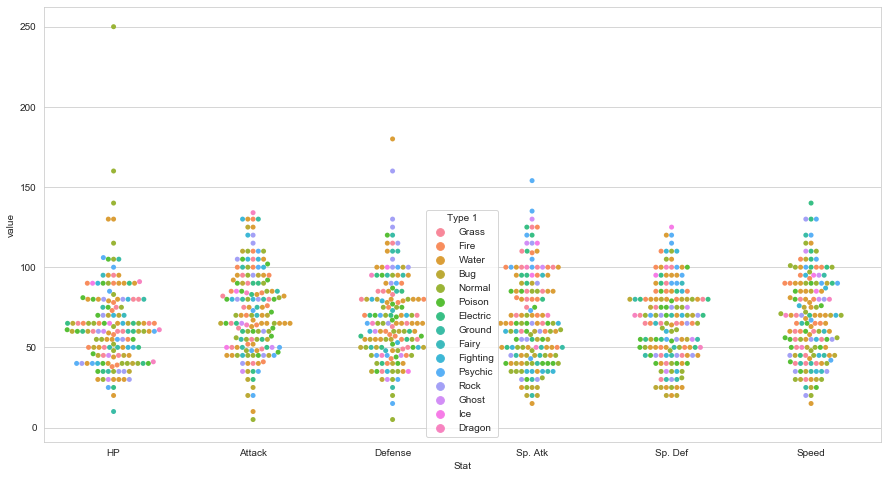

In [116]:
# Swarmplot with melted_df

plt.figure(figsize=(15,8))   # size of the plot


sns.swarmplot(x='Stat',y='value',
             data=melted_df,
             hue='Type 1' )   #=> to colour our points by the pokemon thpe

Final tweaks
1. Enlarge the plot
2. Seperate points by hue using the arguments split=True
3. Use or custom pokemon color palette
4. Adjust the y-axis limits to end at 0
5. Place the legend to the right

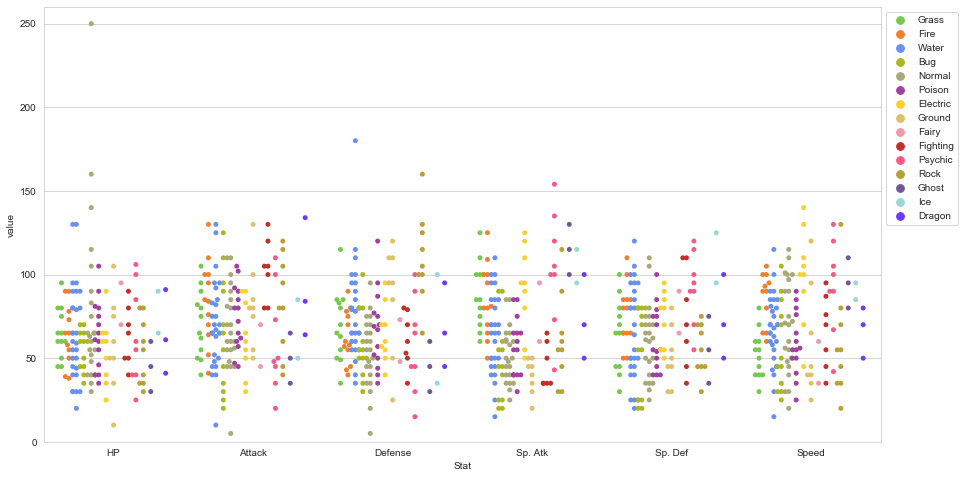

In [124]:
# 1. Enlarge the plot
plt.figure(figsize=(15,8))

sns.swarmplot(x='Stat',
             y='value',
             data=melted_df,
             hue='Type 1',
             split=True,      #2. Seperate points by hue
             palette=pkmn_type_colors)    #3. Use pokemon palette

#4 Adjust the y-axis
plt.ylim(0,260)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

# Pokedex (mini-gallery)

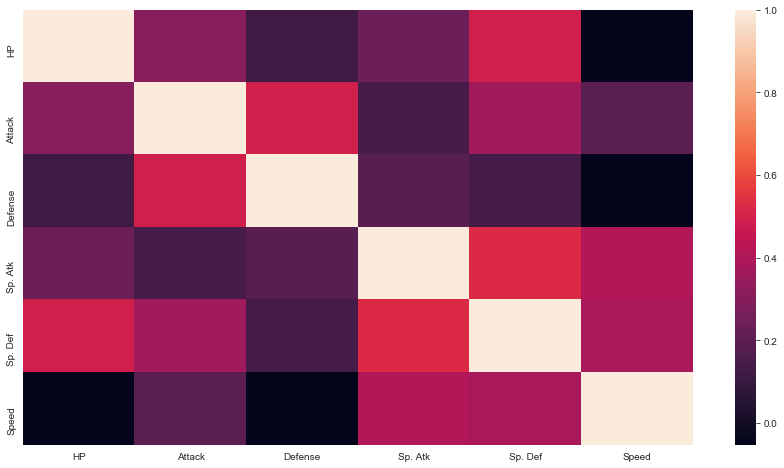

In [128]:
plt.figure(figsize=(15,8))  #size of the plot
#Heatmap

# calculate correlations
corr = stats_df.corr()
# heatmap
sns.heatmap(corr)

# Histogram

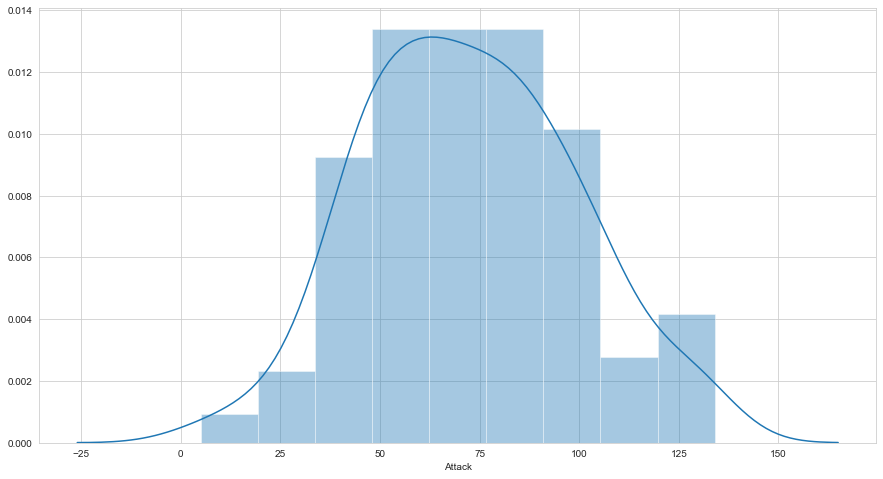

In [132]:
plt.figure(figsize=(15,8))  #size of the plot
#Distribution plot(aka Histogram)
sns.distplot(df.Attack)

# BarPlot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

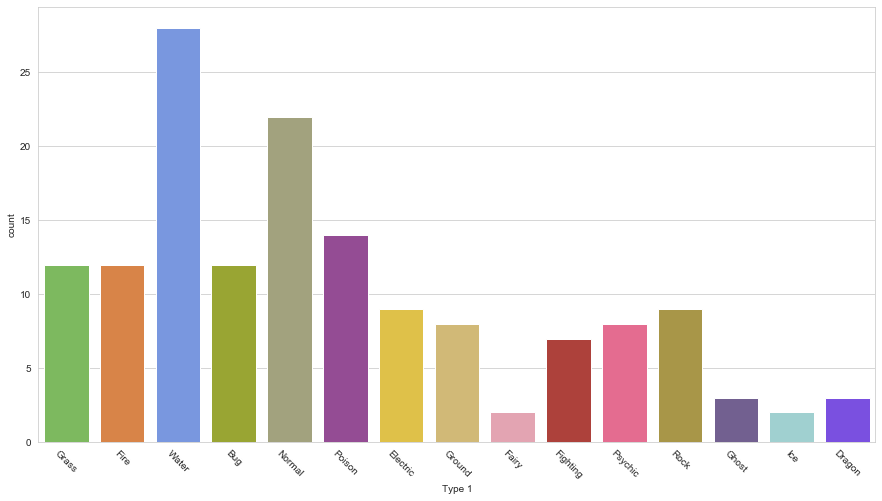

In [136]:
plt.figure(figsize=(15,8))   #size of the plot
#count plot(aka Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

#Roatate x-labels
plt.xticks(rotation=-45)

# Factor Plot

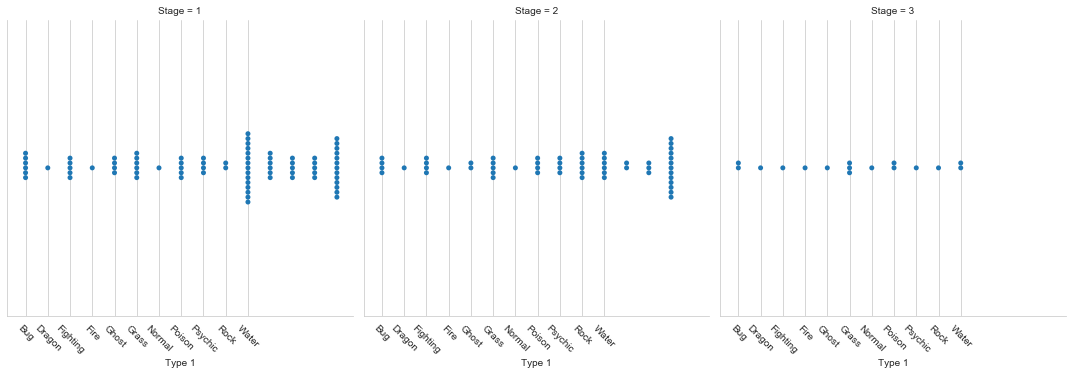

In [144]:
g = sns.factorplot(x='Type 1',
                  data=df,
                  hue='Stage',   #color bystage
                  col='Stage',   #seperate by stage
                  kind='swarm')  #swarmplot

#Rotate x-axit labels
g.set_xticklabels(rotation=-45)
# plt.xticks(rotation=-45)



# Density Plot

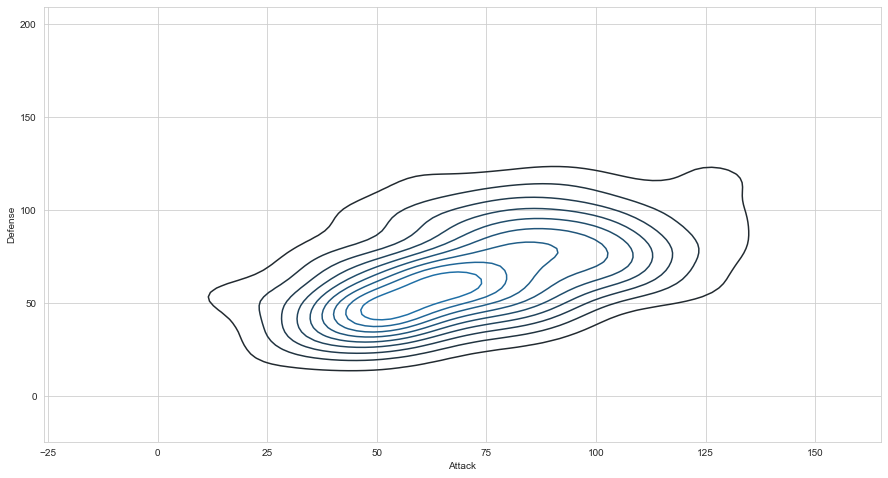

In [147]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.Attack,df.Defense)

# Joint Distribution Plot

<Figure size 1080x576 with 0 Axes>

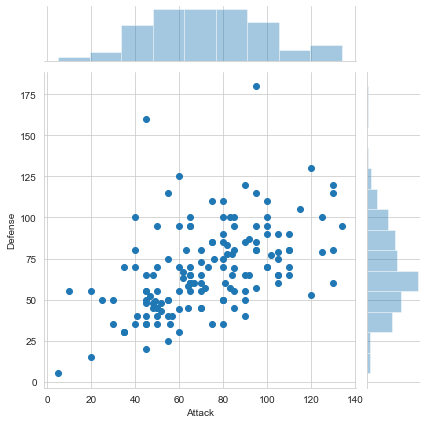

In [150]:
plt.figure(figsize=(15,8))
sns.jointplot(x='Attack',y='Defense',data=df)